In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.describe(include = [np.number])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
cols = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [6]:
data.columns = cols
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
len(data['response'])

9134

In [8]:
data['response'].isna().sum()

0

In [9]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

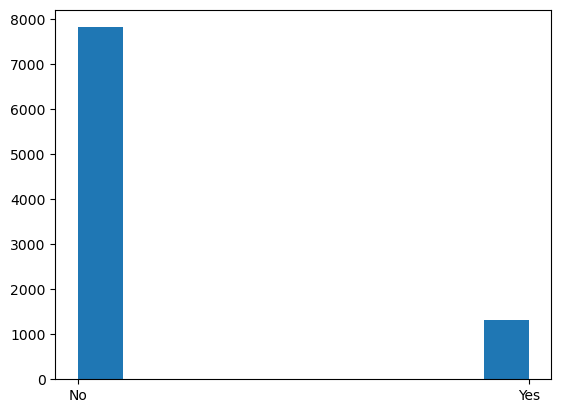

In [10]:
#data['response'].hist()
plt.hist(data['response'])
plt.show()

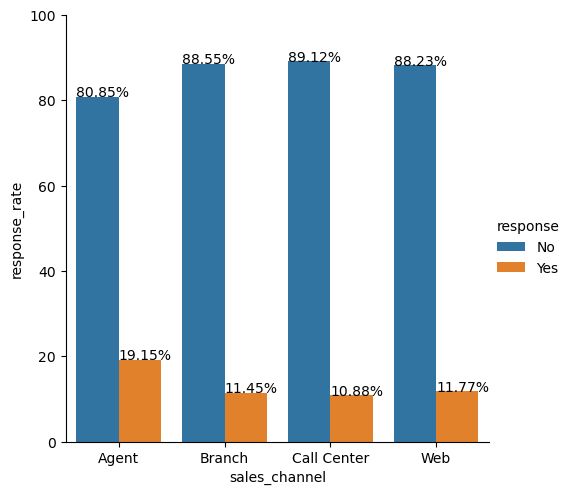

In [11]:
# solution by BhishanPoudel on Stackoverflow (https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)

x,y = 'sales_channel', 'response'

data1 = data.groupby(x)[y].value_counts(normalize=True)
data1 = data1.mul(100)
data1 = data1.rename('response_rate').reset_index()

g = sns.catplot(x=x,y='response_rate',hue=y,kind='bar',data=data1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

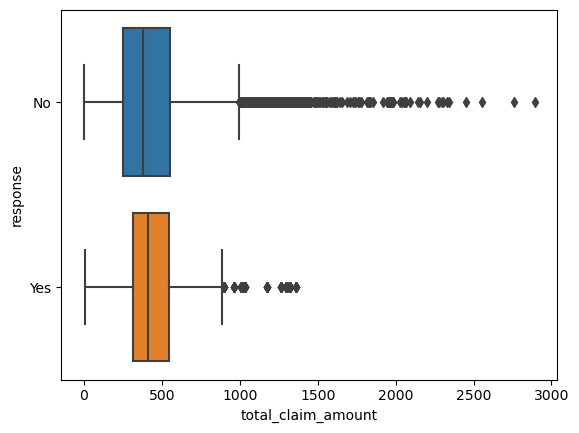

In [12]:
# I will not attempt to change the values to percentages in this and the next case, as by using boxplots, I am already visualising the distribution of my data

sns.boxplot(x = 'total_claim_amount', y = 'response', data = data)
plt.show()

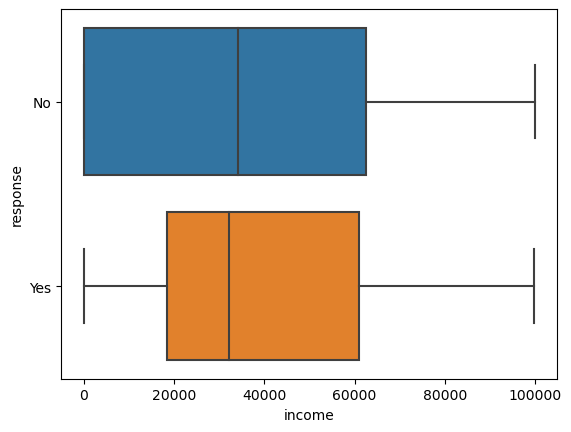

In [13]:
sns.boxplot(x = 'income', y = 'response', data = data)
plt.show()

In [14]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [15]:
numericals = data.select_dtypes(include=np.number)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [16]:
categoricals = data.select_dtypes(include=np.object)
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


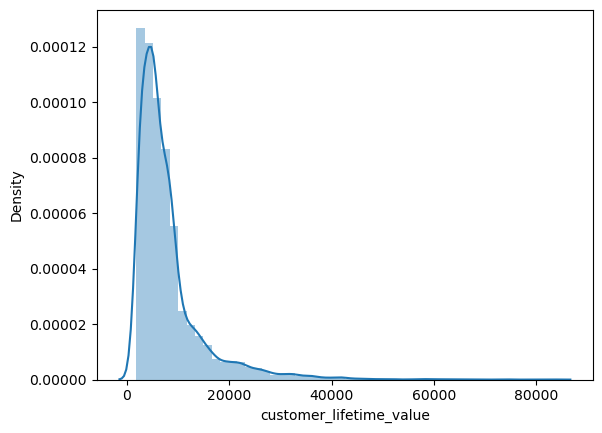

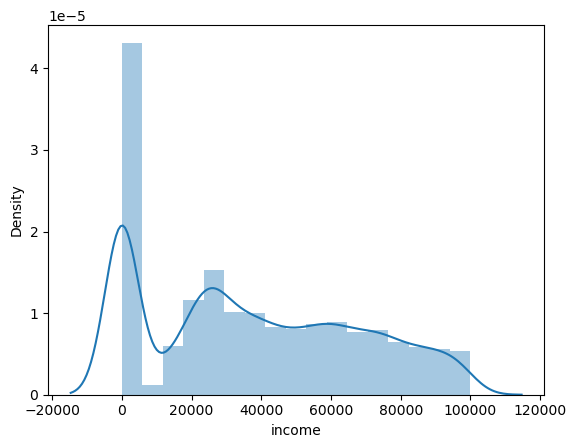

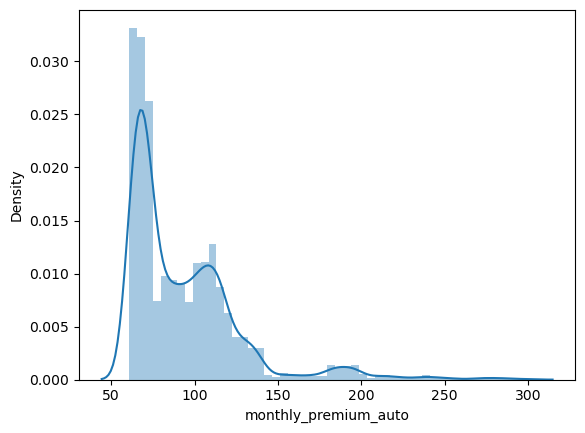

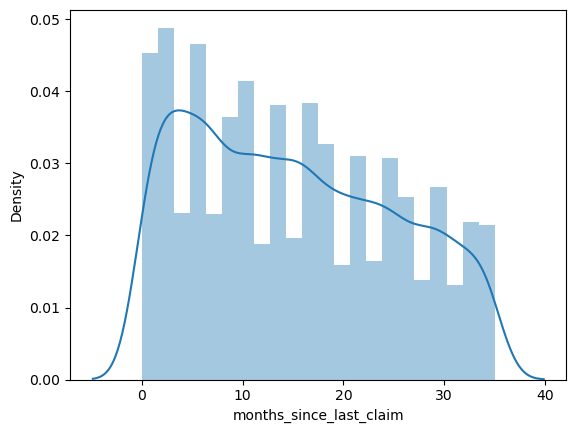

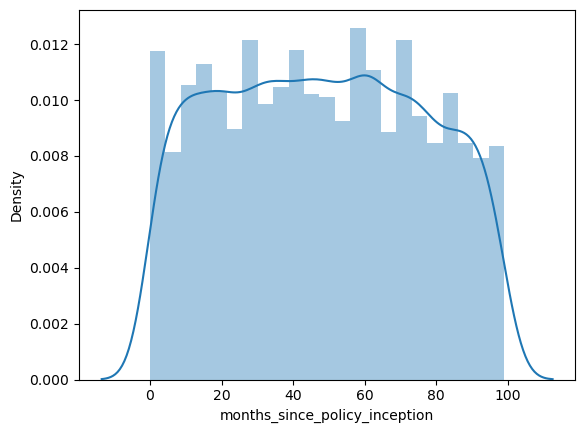

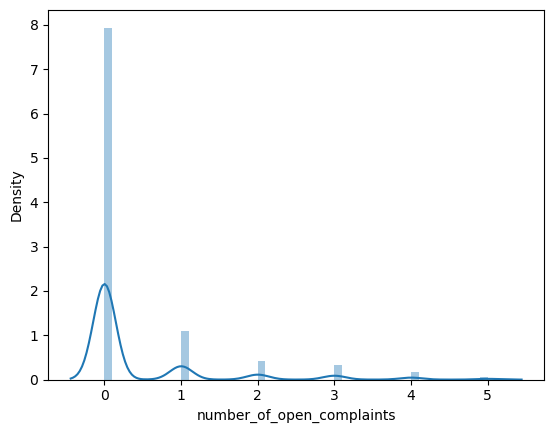

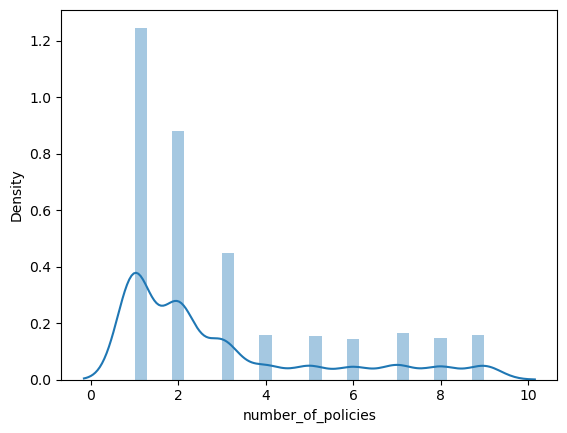

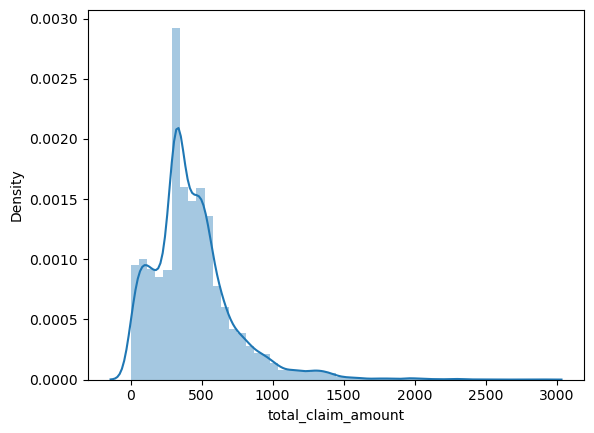

In [17]:
for column in numericals.columns:
    sns.distplot(numericals[column])
    plt.show()

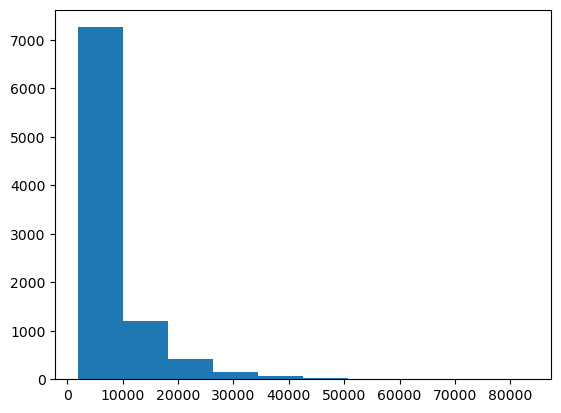

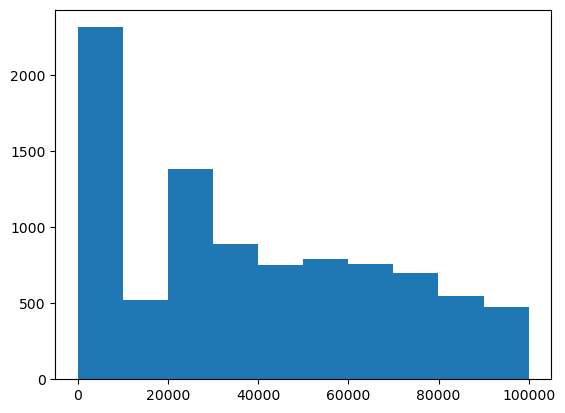

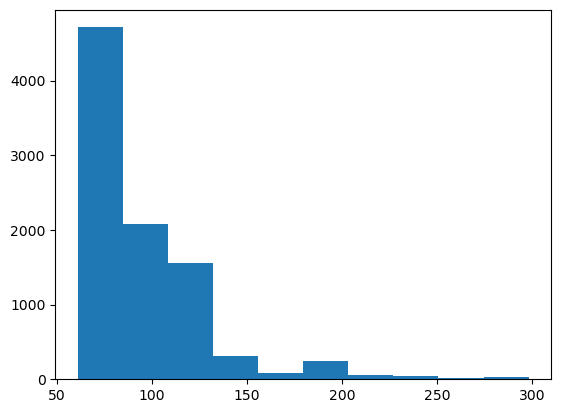

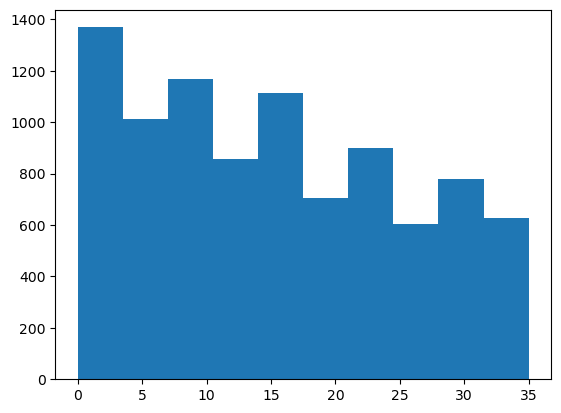

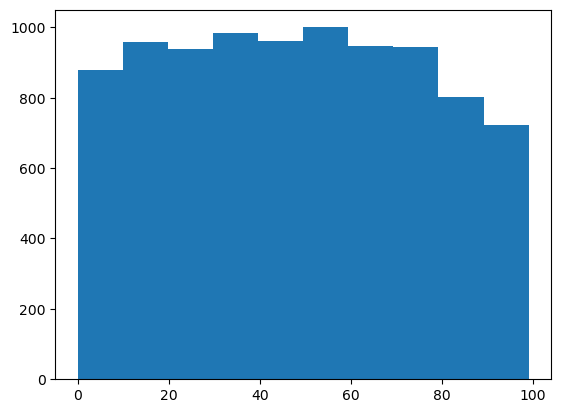

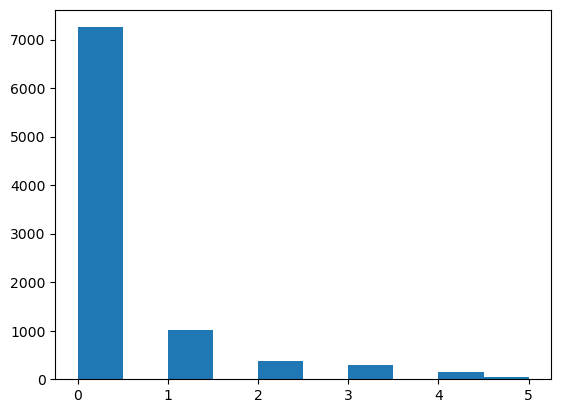

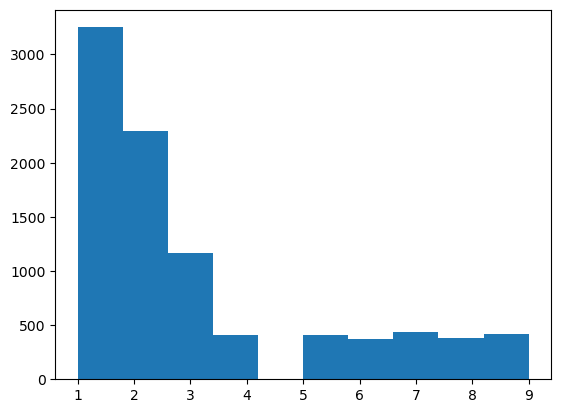

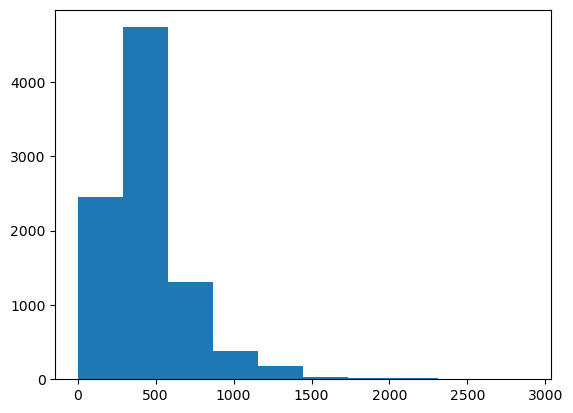

In [18]:
for column in numericals.columns:
    plt.hist(numericals[column])
    plt.show()

In [19]:
# before going any further I will deal with the outliers in my columns

numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

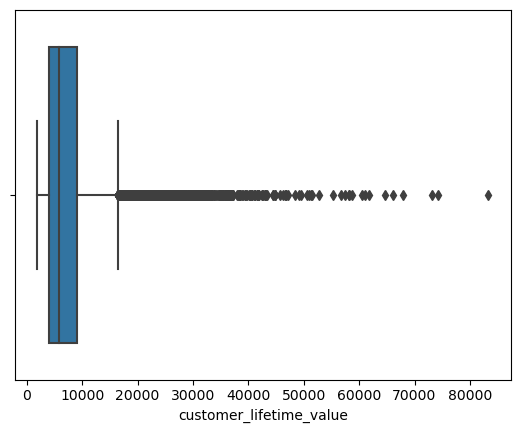

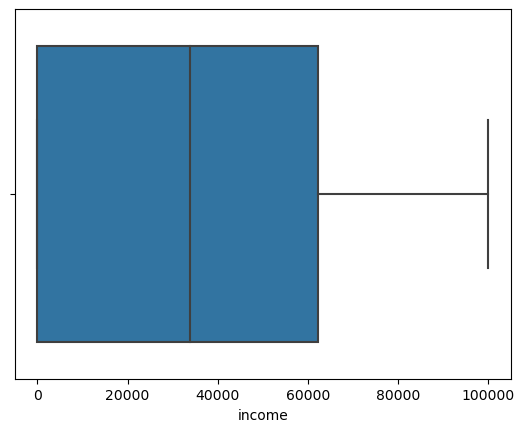

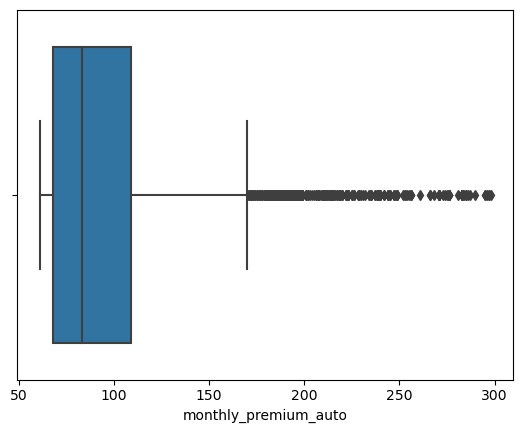

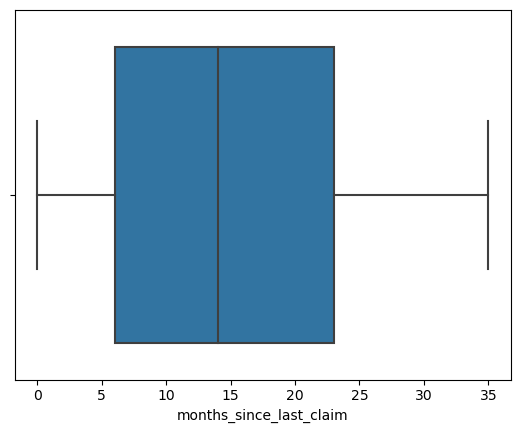

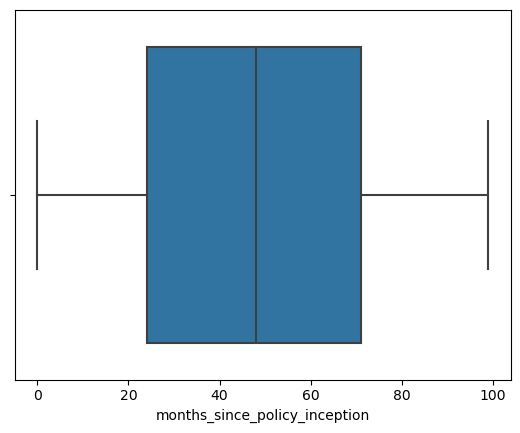

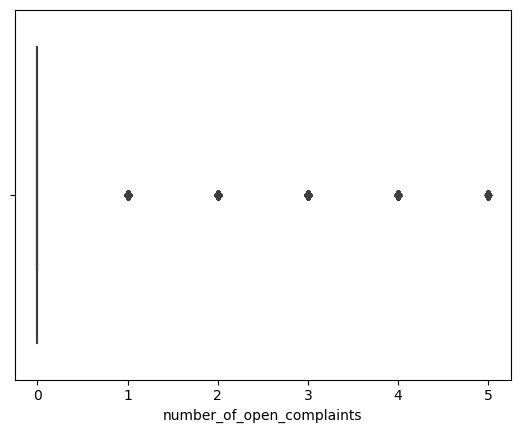

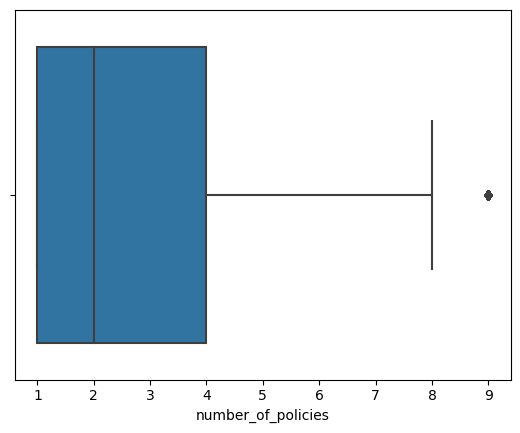

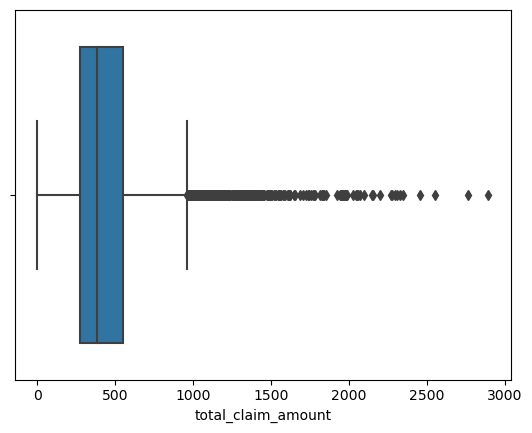

In [20]:
for column in numericals.columns:
    sns.boxplot(x=numericals[column] ,whis=1.5)
    plt.show()

<AxesSubplot:xlabel='customer_lifetime_value'>

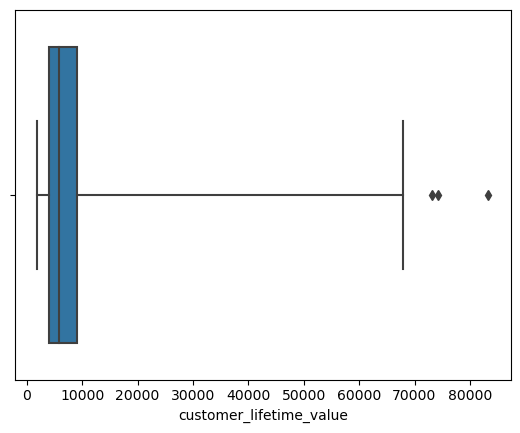

In [21]:
sns.boxplot(x=numericals['customer_lifetime_value'] ,whis=12)

In [22]:
numericals = round(numericals, 2)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


In [23]:
iqr = np.percentile(numericals['customer_lifetime_value'],75) - np.percentile(numericals['customer_lifetime_value'],25)
iqr

4967.92

In [24]:
np.percentile(numericals['customer_lifetime_value'],75)

8962.17

In [25]:
# define the limits
upper_limit = np.percentile(numericals['customer_lifetime_value'],75) + 12*iqr
lower_limit = np.percentile(numericals['customer_lifetime_value'],25) - 12*iqr
upper_limit, lower_limit

(68577.21, -55620.79)

In [26]:
# remove them from the data
numericals = numericals[(numericals['customer_lifetime_value']>lower_limit) & (numericals['customer_lifetime_value']<upper_limit)]
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13
...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,2,198.23
9130,3096.51,21604,79,14,28,0,1,379.20
9131,8163.89,0,85,9,37,3,2,790.78
9132,7524.44,21941,96,34,3,0,3,691.20


<AxesSubplot:xlabel='monthly_premium_auto'>

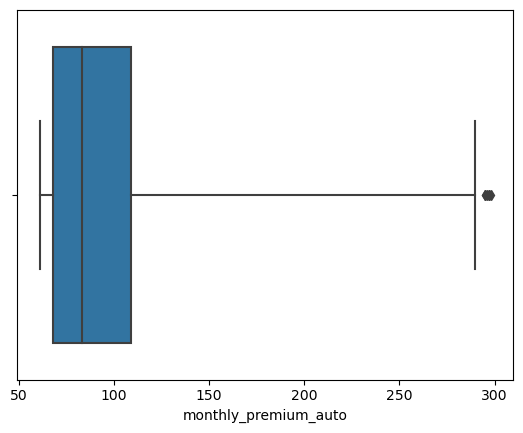

In [27]:
sns.boxplot(x=numericals['monthly_premium_auto'] ,whis=4.5)

In [28]:
iqr = np.percentile(numericals['monthly_premium_auto'],75) - np.percentile(numericals['monthly_premium_auto'],25)
iqr

41.0

In [29]:
np.percentile(numericals['monthly_premium_auto'],75)

109.0

In [30]:
upper_limit = np.percentile(numericals['monthly_premium_auto'],75) + 4.5*iqr
lower_limit = np.percentile(numericals['monthly_premium_auto'],25) - 4.5*iqr
upper_limit, lower_limit

(293.5, -116.5)

In [31]:
numericals = numericals[(numericals['monthly_premium_auto']>lower_limit) & (numericals['monthly_premium_auto']<upper_limit)]
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13
...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,2,198.23
9130,3096.51,21604,79,14,28,0,1,379.20
9131,8163.89,0,85,9,37,3,2,790.78
9132,7524.44,21941,96,34,3,0,3,691.20


<AxesSubplot:xlabel='total_claim_amount'>

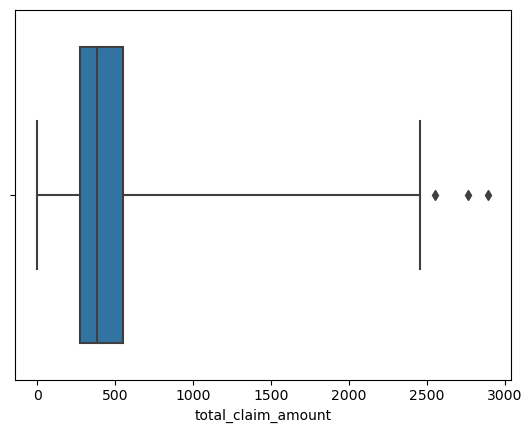

In [32]:
sns.boxplot(x=numericals['total_claim_amount'] ,whis=7)

In [33]:
iqr = np.percentile(numericals['total_claim_amount'],75) - np.percentile(numericals['total_claim_amount'],25)
iqr

275.18000000000006

In [34]:
np.percentile(numericals['total_claim_amount'],75)

547.2

In [35]:
upper_limit = np.percentile(numericals['total_claim_amount'],75) + 7*iqr
lower_limit = np.percentile(numericals['total_claim_amount'],25) - 7*iqr
upper_limit, lower_limit

(2473.4600000000005, -1654.2400000000005)

In [36]:
numericals = numericals[(numericals['total_claim_amount']>lower_limit) & (numericals['total_claim_amount']<upper_limit)]
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13
...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,2,198.23
9130,3096.51,21604,79,14,28,0,1,379.20
9131,8163.89,0,85,9,37,3,2,790.78
9132,7524.44,21941,96,34,3,0,3,691.20


In [37]:
# First scaling and transforming the data

transformer = MinMaxScaler().fit(numericals)
x_minmax = transformer.transform(numericals)
print(x_minmax.shape)

(9122, 8)


In [38]:
x_minmax

array([[0.01311195, 0.56284694, 0.0349345 , ..., 0.        , 0.        ,
        0.15684588],
       [0.07698208, 0.        , 0.1441048 , ..., 0.        , 0.875     ,
        0.46125433],
       [0.16648301, 0.48776267, 0.20524017, ..., 0.        , 0.125     ,
        0.23090848],
       ...,
       [0.09492426, 0.        , 0.10480349, ..., 0.6       , 0.125     ,
        0.32235944],
       [0.08523698, 0.2194517 , 0.15283843, ..., 0.        , 0.25      ,
        0.28176077],
       [0.01081409, 0.        , 0.069869  , ..., 0.        , 0.        ,
        0.15064478]])

In [39]:
# then we create a new data frame with the transformed data

norm_num = pd.DataFrame(x_minmax,columns=numericals.columns)
norm_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.013112,0.562847,0.034934,0.914286,0.050505,0.0,0.000,0.156846
1,0.076982,0.000000,0.144105,0.371429,0.424242,0.0,0.875,0.461254
2,0.166483,0.487763,0.205240,0.514286,0.383838,0.0,0.125,0.230908
3,0.087076,0.000000,0.196507,0.514286,0.656566,0.0,0.750,0.215991
4,0.013872,0.438443,0.052402,0.342857,0.444444,0.0,0.000,0.056275


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

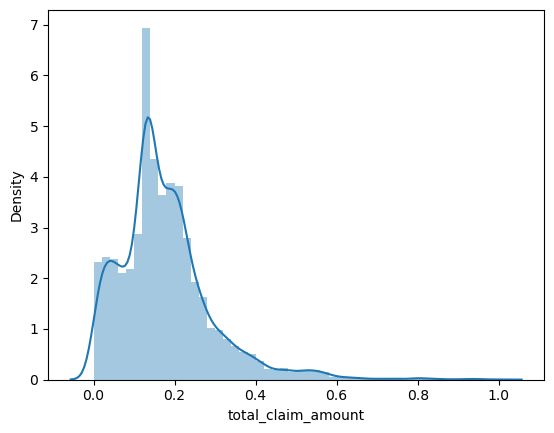

In [40]:
sns.distplot(norm_num['total_claim_amount'])

In [ ]:
nums = numericals.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

#data1['HV1'] = data1['HV1'].apply(log_transfom_clean)

nums['total_claim_amount'] = list(map(log_transfom_clean, nums['total_claim_amount']))

nums['total_claim_amount'] = nums['total_claim_amount'].fillna(np.mean(nums['total_claim_amount']))

sns.distplot(nums['total_claim_amount'])
plt.show()

In [47]:
# checking multicollinearity
# since total_claim_amount will play the role of TARGET_D it should be removed (split)

y = numericals['total_claim_amount']
x = numericals.drop(['total_claim_amount'], axis=1)
x.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.52,56274,69,32,5,0,1
1,6979.54,0,94,13,42,0,8
2,12887.43,48767,108,18,38,0,2
3,7645.86,0,106,18,65,0,7
4,2813.69,43836,73,12,44,0,1


In [49]:
ordered_columns = sorted(x.columns, reverse=False)
ordered_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [50]:
x = x[ordered_columns]
x.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.52,56274,69,32,5,0,1
1,6979.54,0,94,13,42,0,8
2,12887.43,48767,108,18,38,0,2
3,7645.86,0,106,18,65,0,7
4,2813.69,43836,73,12,44,0,1


In [51]:
x_corr = x.corr()
x_corr = round(x_corr, 2)
x_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.00,0.02,0.39,0.01,0.01,-0.03,0.02
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01
monthly_premium_auto,0.39,-0.02,1.00,0.00,0.02,-0.01,-0.01
months_since_last_claim,0.01,-0.03,0.00,1.00,-0.04,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01
number_of_open_complaints,-0.03,0.01,-0.01,0.01,-0.00,1.00,0.00
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00


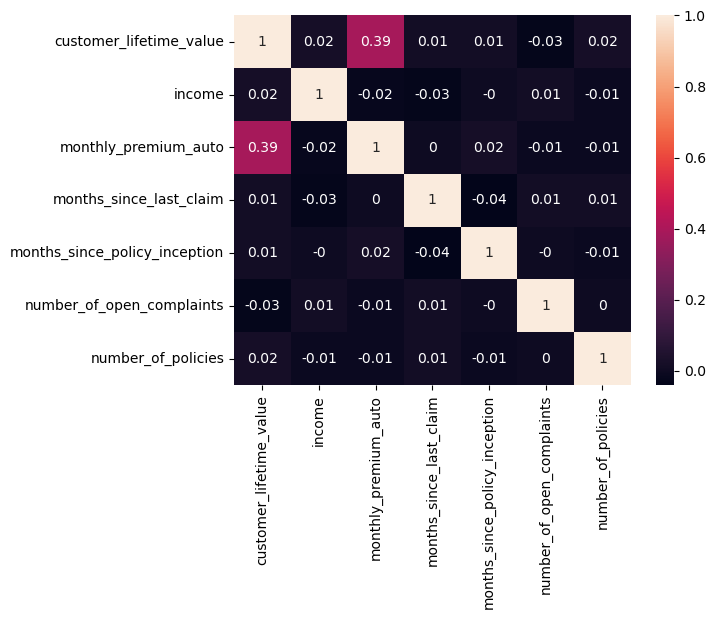

In [52]:
sns_plot = sns.heatmap(x_corr, annot=True)
figure = sns_plot.get_figure()    
plt.show()

# there aren't any values that are highly correlated